# Making plot for Castro et al paper --> showing FCGR genes in the atlas

In [1]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

In [3]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [4]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')

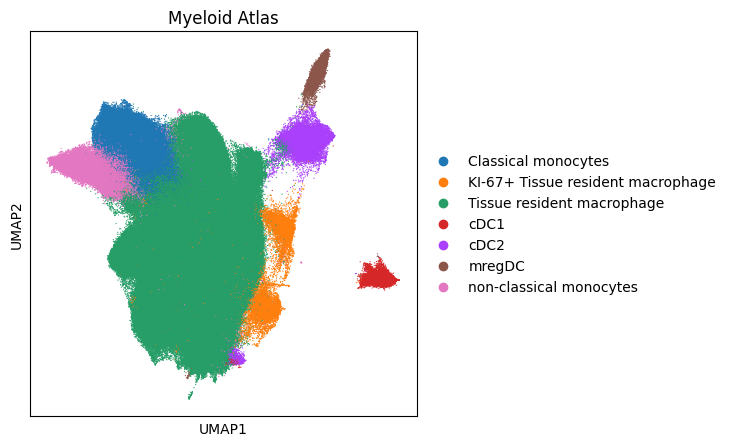

In [7]:
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(data, color="NR_annotations_simple", size=3, title="Myeloid Atlas")

In [8]:
colour_vars = ["FCGR1A","FCGR1B","FCGR2A","FCGR2B","FCGR3A","FCGR3B","NR_annotations_simple"]

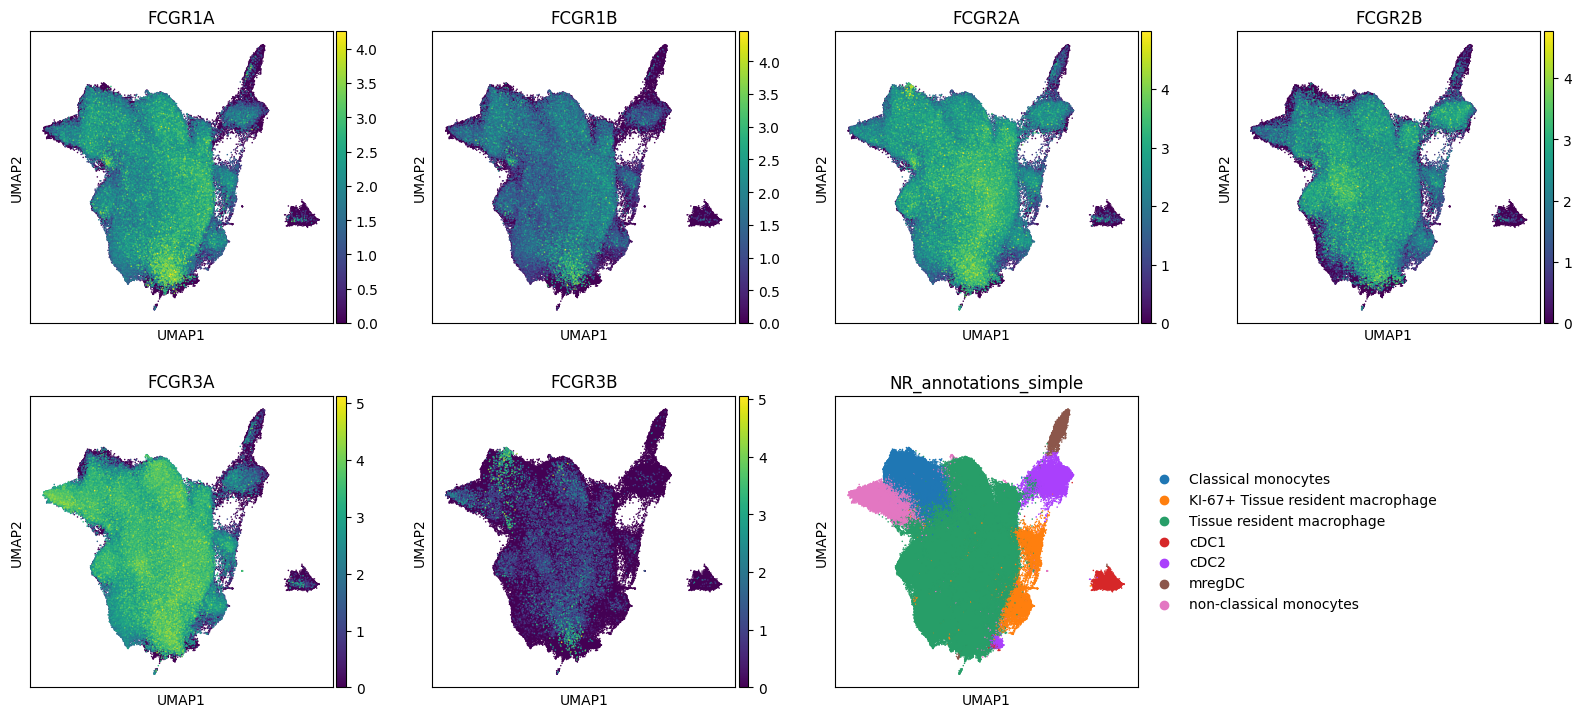

In [9]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data, color=colour_vars, ncols=4, size=5)

In [24]:
data_P = data[data.obs["sample_type_major2"].isin(["primary tumour"])]

In [25]:
data_DC_M = data_P[data_P.obs["NR_annotations_simple"].isin(["cDC1","cDC2","mregDC","Classical monocytes"])]

In [5]:
dot_vars = ["FCGR1A","FCGR1B","FCGR2A","FCGR2B","FCGR3A","FCGR3B"]

### Make new metadata column that combines cancer type and cell type:

In [27]:
data_DC_M.obs["cancer_cell"] = data_DC_M.obs["cancer_broadest"].astype(str) + "_" + data_DC_M.obs["NR_annotations_simple"].astype(str)

/scratch/temp/13991907/ipykernel_1541514/3892211695.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


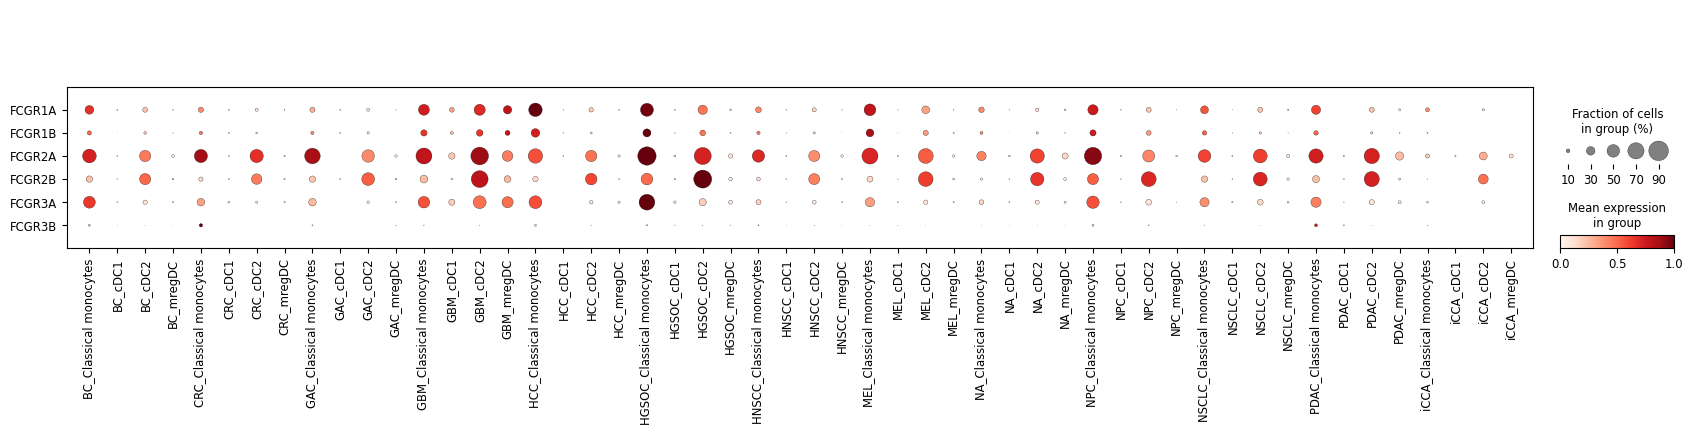

In [20]:
sc.pl.dotplot(data_DC_M, dot_vars, groupby="cancer_cell", standard_scale="var", swap_axes=True)

In [28]:
cat_order = ["BC_cDC1","BC_cDC2","BC_mregDC","BC_Classical monocytes","CRC_cDC1","CRC_cDC2","CRC_mregDC","CRC_Classical monocytes",
         "GAC_cDC1","GAC_cDC2","GAC_mregDC","GAC_Classical monocytes","GBM_cDC1","GBM_cDC2","GBM_mregDC","GBM_Classical monocytes",
         "HCC_cDC1","HCC_cDC2","HCC_mregDC","HCC_Classical monocytes","HGSOC_cDC1","HGSOC_cDC2","HGSOC_mregDC","HGSOC_Classical monocytes",
         "HNSCC_cDC1","HNSCC_cDC2","HNSCC_mregDC","HNSCC_Classical monocytes","MEL_cDC1","MEL_cDC2","MEL_mregDC","MEL_Classical monocytes",
         "NPC_cDC1","NPC_cDC2","NPC_mregDC","NPC_Classical monocytes",
         "NSCLC_cDC1","NSCLC_cDC2","NSCLC_mregDC","NSCLC_Classical monocytes","PDAC_cDC1","PDAC_cDC2","PDAC_mregDC","PDAC_Classical monocytes",
         "iCCA_cDC1","iCCA_cDC2","iCCA_mregDC","iCCA_Classical monocytes"]

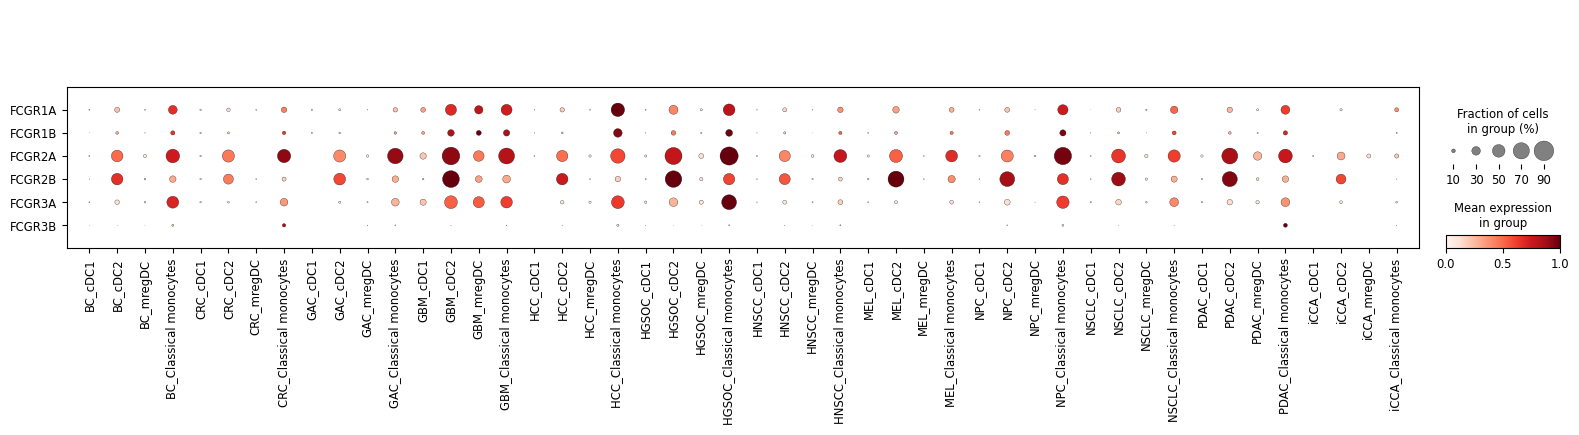

In [29]:
sc.pl.dotplot(data_DC_M, dot_vars, groupby="cancer_cell", standard_scale="var", swap_axes=True, categories_order=cat_order)

In [30]:
cat_order2 = ["BC_cDC1","CRC_cDC1","GAC_cDC1","GBM_cDC1","HCC_cDC1","HGSOC_cDC1","HNSCC_cDC1","MEL_cDC1","NPC_cDC1","NSCLC_cDC1","PDAC_cDC1","iCCA_cDC1",
              "BC_cDC2","CRC_cDC2","GAC_cDC2","GBM_cDC2","HCC_cDC2","HGSOC_cDC2","HNSCC_cDC2","MEL_cDC2","NPC_cDC2","NSCLC_cDC2","PDAC_cDC2","iCCA_cDC2",
              "BC_mregDC","CRC_mregDC","GAC_mregDC","GBM_mregDC","HCC_mregDC","HGSOC_mregDC","HNSCC_mregDC","MEL_mregDC","NPC_mregDC","NSCLC_mregDC","PDAC_mregDC","iCCA_mregDC",
              "BC_Classical monocytes","CRC_Classical monocytes","GAC_Classical monocytes","GBM_Classical monocytes","HCC_Classical monocytes","HGSOC_Classical monocytes","HNSCC_Classical monocytes","MEL_Classical monocytes","NPC_Classical monocytes","NSCLC_Classical monocytes","PDAC_Classical monocytes","iCCA_Classical monocytes"]


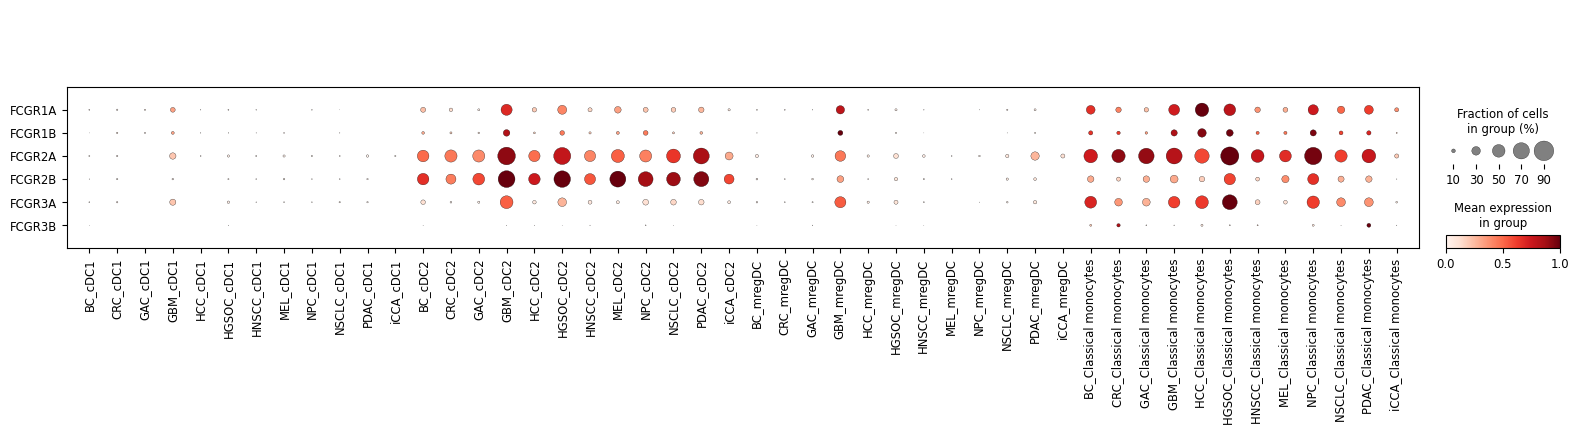

In [31]:
sc.pl.dotplot(data_DC_M, dot_vars, groupby="cancer_cell", standard_scale="var", swap_axes=True, categories_order=cat_order2)

In [11]:
data_P = data[data.obs["sample_type_major2"].isin(["primary tumour"])]
data_M = data[data.obs["sample_type_major2"].isin(["metastatic tumour"])]
data_H = data[data.obs["sample_type_major2"].isin(["healthy"])]

In [12]:
data_P_DC1 = data_P[data_P.obs["NR_annotations_simple"].isin(["cDC1"])]
data_P_DC2 = data_P[data_P.obs["NR_annotations_simple"].isin(["cDC2"])]
data_P_mregDC = data_P[data_P.obs["NR_annotations_simple"].isin(["mregDC"])]
data_P_mono = data_P[data_P.obs["NR_annotations_simple"].isin(["Classical monocytes"])]

data_M_DC1 = data_M[data_M.obs["NR_annotations_simple"].isin(["cDC1"])]
data_M_DC2 = data_M[data_M.obs["NR_annotations_simple"].isin(["cDC2"])]
data_M_mregDC = data_M[data_M.obs["NR_annotations_simple"].isin(["mregDC"])]
data_M_mono = data_M[data_M.obs["NR_annotations_simple"].isin(["Classical monocytes"])]

data_H_DC1 = data_H[data_H.obs["NR_annotations_simple"].isin(["cDC1"])]
data_H_DC2 = data_H[data_H.obs["NR_annotations_simple"].isin(["cDC2"])]
data_H_mregDC = data_H[data_H.obs["NR_annotations_simple"].isin(["mregDC"])]
data_H_mono = data_H[data_H.obs["NR_annotations_simple"].isin(["Classical monocytes"])]

In [13]:
# Set directory for saving plots
sc.settings.figdir = "Castro_dotplots_svg2"
sc.settings.dpi = 600

In [11]:
data.var.index.isin(dot_vars)

array([False, False, False, ..., False, False, False])

In [6]:
from tqdm import tqdm
data2 = data.raw.to_adata()
data2.var["keep"] = False
for i in tqdm(data2.var.index):
    if i in dot_vars:
        data2.var.loc[i, "keep"] = True

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15074/15074 [00:00<00:00, 3617194.26it/s]


In [7]:
data2.var.keep.value_counts()

keep
False    15068
True         6
Name: count, dtype: int64

In [10]:
import numpy as np
np.max(data2.X)

8.941265918373597

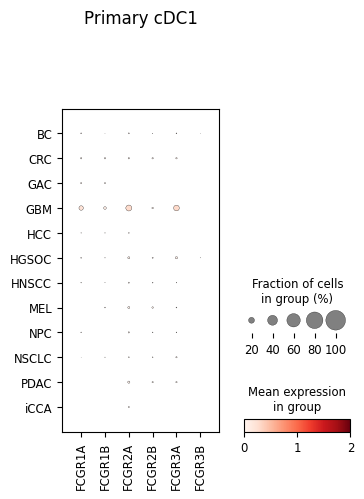

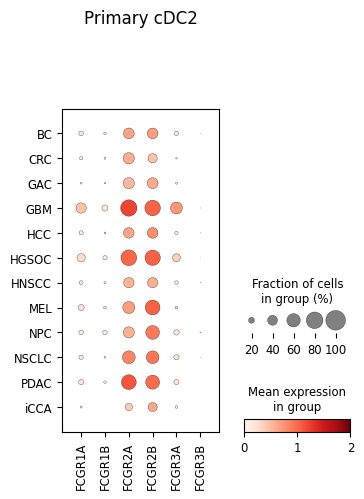

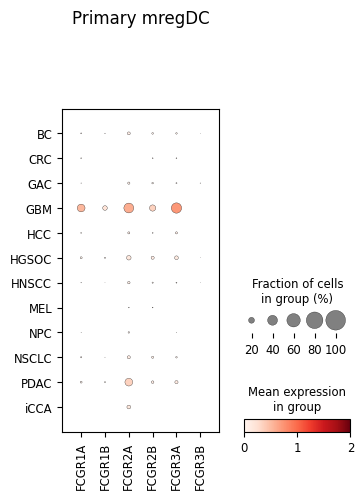

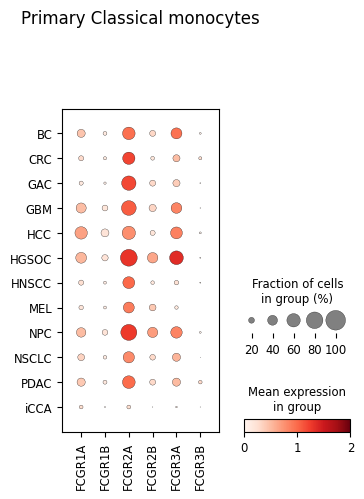

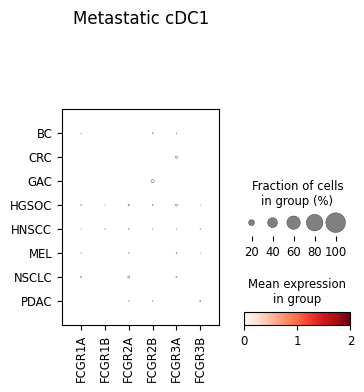

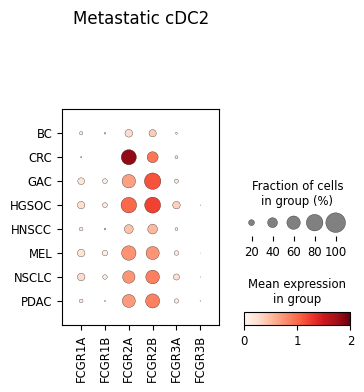

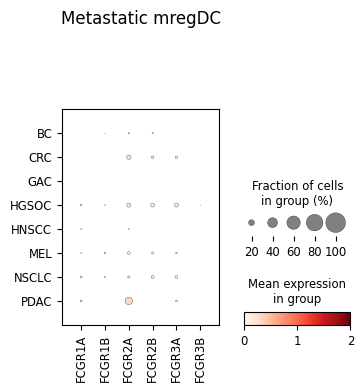

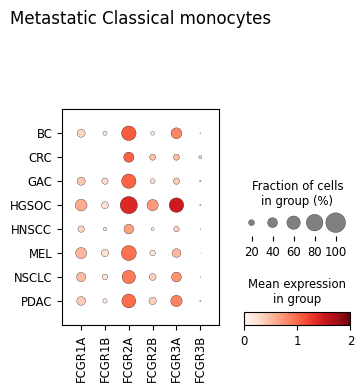

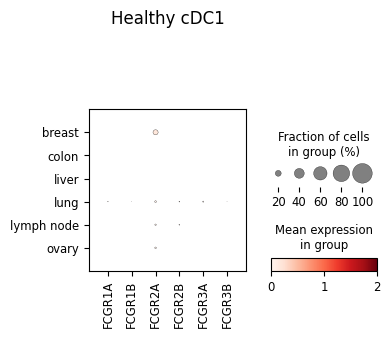

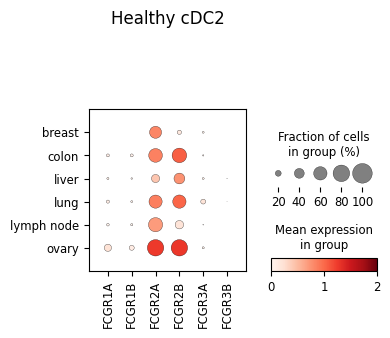

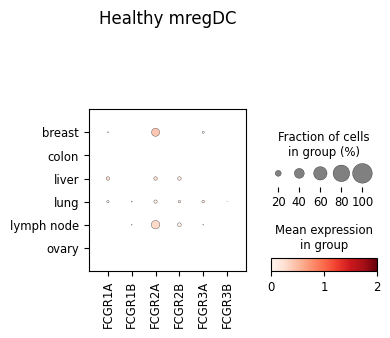

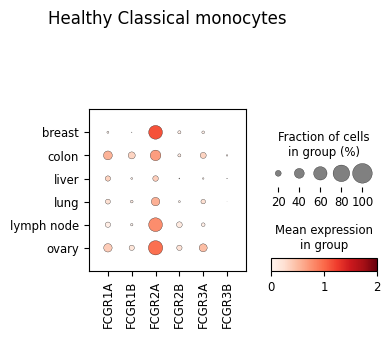

In [16]:
sc.pl.dotplot(data_P_DC1, dot_vars, groupby="cancer_broadest", title="Primary cDC1", dot_min=0.0, dot_max=1.0, vmin=0, vmax=2, save="_Primary_cDC1.svg")
sc.pl.dotplot(data_P_DC2, dot_vars, groupby="cancer_broadest", title="Primary cDC2", dot_min=0.0, dot_max=1.0, vmin=0, vmax=2, save="_Primary_cDC2.svg")
sc.pl.dotplot(data_P_mregDC, dot_vars, groupby="cancer_broadest", title="Primary mregDC", dot_min=0.0, dot_max=1.0, vmin=0, vmax=2, save="_Primary_mregDC.svg")
sc.pl.dotplot(data_P_mono, dot_vars, groupby="cancer_broadest", title="Primary Classical monocytes", dot_min=0.0, dot_max=1.0, vmin=0, vmax=2, save="_Primary_mono.svg")

sc.pl.dotplot(data_M_DC1, dot_vars, groupby="cancer_broadest", title="Metastatic cDC1", dot_min=0.0, dot_max=1.0, vmin=0, vmax=2, save="_Mets_cDC1.svg")
sc.pl.dotplot(data_M_DC2, dot_vars, groupby="cancer_broadest", title="Metastatic cDC2", dot_min=0.0, dot_max=1.0, vmin=0, vmax=2, save="_Mets_cDC2.svg")
sc.pl.dotplot(data_M_mregDC, dot_vars, groupby="cancer_broadest", title="Metastatic mregDC", dot_min=0.0, dot_max=1.0, vmin=0, vmax=2, save="_Mets_mregDC.svg")
sc.pl.dotplot(data_M_mono, dot_vars, groupby="cancer_broadest", title="Metastatic Classical monocytes", dot_min=0.0, dot_max=1.0, vmin=0, vmax=2, save="_Mets_mono.svg")

sc.pl.dotplot(data_H_DC1, dot_vars, groupby="site", title="Healthy cDC1", dot_min=0.0, dot_max=1.0, vmin=0, vmax=2, save="_Healthy_cDC1.svg")
sc.pl.dotplot(data_H_DC2, dot_vars, groupby="site", title="Healthy cDC2", dot_min=0.0, dot_max=1.0, vmin=0, vmax=2, save="_Healthy_cDC2.svg")
sc.pl.dotplot(data_H_mregDC, dot_vars, groupby="site", title="Healthy mregDC", dot_min=0.0, dot_max=1.0, vmin=0, vmax=2, save="_Healthy_mregDC.svg")
sc.pl.dotplot(data_H_mono, dot_vars, groupby="site", title="Healthy Classical monocytes", dot_min=0.0, dot_max=1.0, vmin=0, vmax=2, save="_Healthy_mono.svg")

# DC and cancers together:

In [39]:
dot_vars = ["FCGR1A","FCGR1B","FCGR2A","FCGR2B","FCGR3A","FCGR3B"]

In [40]:
data_P = data[data.obs["sample_type_major2"].isin(["primary tumour"])]
data_M = data[data.obs["sample_type_major2"].isin(["metastatic tumour"])]
data_H = data[data.obs["sample_type_major2"].isin(["healthy"])]

In [41]:
data_P_DCM = data_P[data_P.obs["NR_annotations_simple"].isin(["cDC1","cDC2","mregDC","Classical monocytes"])]
data_M_DCM = data_M[data_M.obs["NR_annotations_simple"].isin(["cDC1","cDC2","mregDC","Classical monocytes"])]
data_H_DCM = data_H[data_H.obs["NR_annotations_simple"].isin(["cDC1","cDC2","mregDC","Classical monocytes"])]

In [42]:
data_P_DCM.obs["cancer_cell"] = data_P_DCM.obs["cancer_broadest"].astype(str) + "_" + data_P_DCM.obs["NR_annotations_simple"].astype(str)
data_M_DCM.obs["cancer_cell"] = data_M_DCM.obs["cancer_broadest"].astype(str) + "_" + data_M_DCM.obs["NR_annotations_simple"].astype(str)
data_H_DCM.obs["site_cell"] = data_H_DCM.obs["site"].astype(str) + "_" + data_H_DCM.obs["NR_annotations_simple"].astype(str)

/scratch/temp/13991907/ipykernel_1541514/841008789.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/temp/13991907/ipykernel_1541514/841008789.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/scratch/temp/13991907/ipykernel_1541514/841008789.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


In [44]:
P_cat_order2 = ["BC_cDC1","CRC_cDC1","GAC_cDC1","GBM_cDC1","HCC_cDC1","HGSOC_cDC1","HNSCC_cDC1","MEL_cDC1","NPC_cDC1","NSCLC_cDC1","PDAC_cDC1","iCCA_cDC1",
              "BC_cDC2","CRC_cDC2","GAC_cDC2","GBM_cDC2","HCC_cDC2","HGSOC_cDC2","HNSCC_cDC2","MEL_cDC2","NPC_cDC2","NSCLC_cDC2","PDAC_cDC2","iCCA_cDC2",
              "BC_mregDC","CRC_mregDC","GAC_mregDC","GBM_mregDC","HCC_mregDC","HGSOC_mregDC","HNSCC_mregDC","MEL_mregDC","NPC_mregDC","NSCLC_mregDC","PDAC_mregDC","iCCA_mregDC",
              "BC_Classical monocytes","CRC_Classical monocytes","GAC_Classical monocytes","GBM_Classical monocytes","HCC_Classical monocytes","HGSOC_Classical monocytes","HNSCC_Classical monocytes","MEL_Classical monocytes","NPC_Classical monocytes","NSCLC_Classical monocytes","PDAC_Classical monocytes","iCCA_Classical monocytes"]


In [46]:
M_cat_order2 = ["BC_cDC1","CRC_cDC1","GAC_cDC1","HGSOC_cDC1","HNSCC_cDC1","MEL_cDC1","NSCLC_cDC1","PDAC_cDC1",
              "BC_cDC2","CRC_cDC2","GAC_cDC2","HGSOC_cDC2","HNSCC_cDC2","MEL_cDC2","NSCLC_cDC2","PDAC_cDC2",
              "BC_mregDC","CRC_mregDC","GAC_mregDC","HGSOC_mregDC","HNSCC_mregDC","MEL_mregDC","NSCLC_mregDC","PDAC_mregDC",
              "BC_Classical monocytes","CRC_Classical monocytes","GAC_Classical monocytes","HGSOC_Classical monocytes","HNSCC_Classical monocytes","MEL_Classical monocytes","NSCLC_Classical monocytes","PDAC_Classical monocytes"]


In [49]:
H_cat_order2 = ["breast_cDC1","colon_cDC1","liver_cDC1","ovary_cDC1","lung_cDC1","lymph node_cDC1",
              "breast_cDC2","colon_cDC2","liver_cDC2","ovary_cDC2","lung_cDC2","lymph node_cDC2",
              "breast_mregDC","colon_mregDC","liver_mregDC","ovary_mregDC","lung_mregDC","lymph node_mregDC",
              "breast_Classical monocytes","colon_Classical monocytes","liver_Classical monocytes","ovary_Classical monocytes","lung_Classical monocytes","lymph node_Classical monocytes"]

In [56]:
plot_dot_min = 0.0
plot_dot_max = 1.0

In [58]:
data_P_DC1 = data_P_DCM[data_P_DCM.obs["NR_annotations_simple"].isin(["cDC1"])]

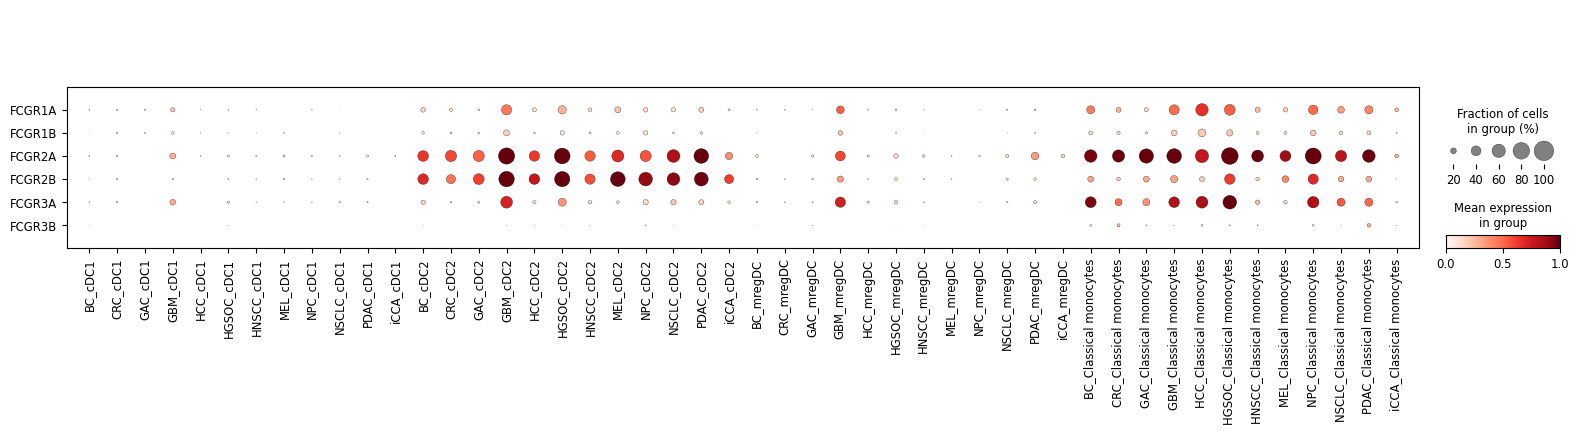

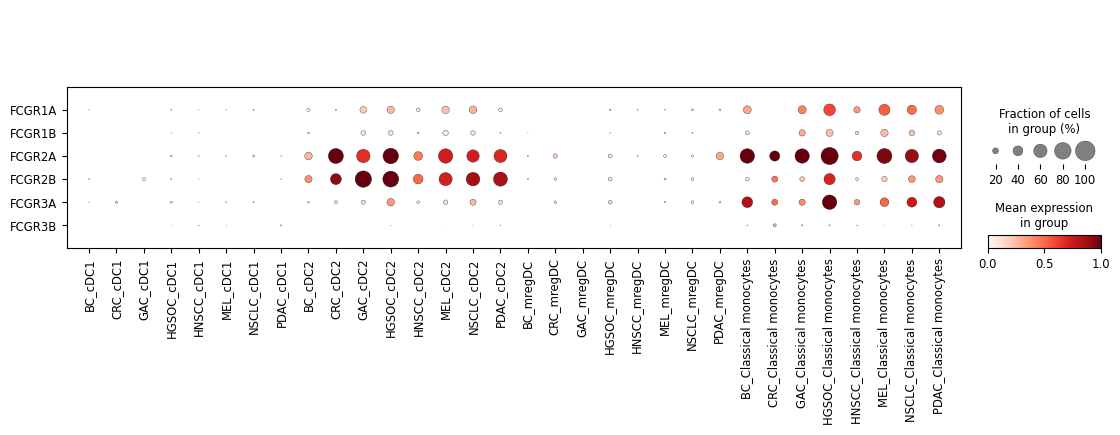

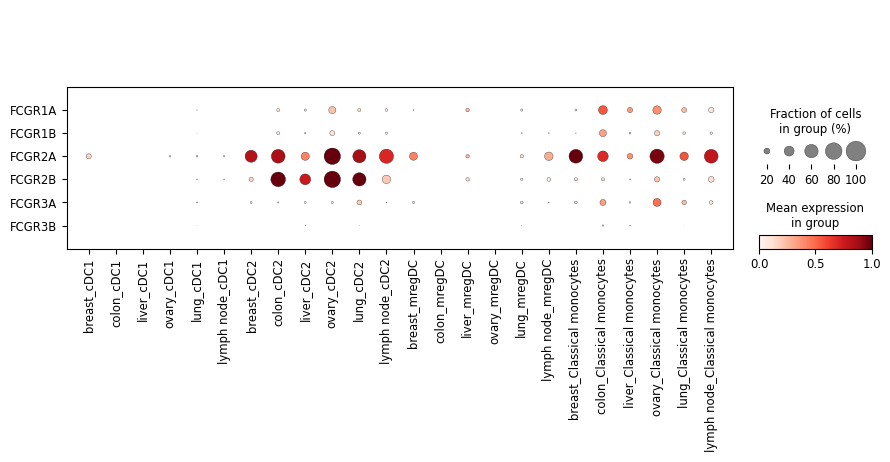

In [67]:
sc.pl.dotplot(data_P_DCM, dot_vars, groupby="cancer_cell", swap_axes=True, categories_order=P_cat_order2, dot_min=0.0, dot_max=1.0, vmin=0, vmax=1)
sc.pl.dotplot(data_M_DCM, dot_vars, groupby="cancer_cell", swap_axes=True, categories_order=M_cat_order2, dot_min=0.0, dot_max=1.0, vmin=0, vmax=1)
sc.pl.dotplot(data_H_DCM, dot_vars, groupby="site_cell", swap_axes=True, categories_order=H_cat_order2, dot_min=0.0, dot_max=1.0, vmin=0, vmax=1)